In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

### Raading And Analyzing the DataSet

In [3]:
data= pd.read_csv('C:/Users/sebam/Downloads/Python/Customer churn/churn (1).csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [122]:
data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [123]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

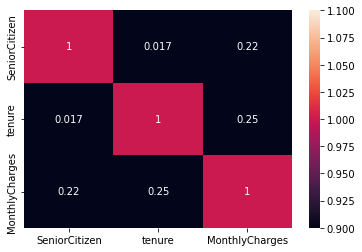

In [124]:
sns.heatmap(data.corr(), vmin=1,vmax=1,annot=True)

### Feature Engineering

In [125]:
#Convert 'TotalCharges' to Numerical data
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
# NA values in TotalCharges

In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


<AxesSubplot:>

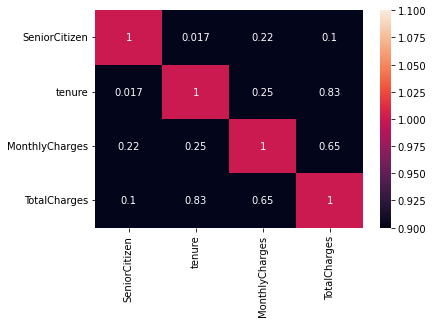

In [129]:
sns.heatmap(data.corr(), vmin=1,vmax=1,annot=True)

In [130]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [131]:
#convert the Yes/No to 0/1
data['gender']=le.fit_transform(data['gender'])
data['Partner']=le.fit_transform(data['Partner'])
data['Dependents']=le.fit_transform(data['Dependents'])
data['PhoneService']=le.fit_transform(data['PhoneService'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
data['Churn']=le.fit_transform(data['Churn'])

In [132]:
data.head()
#Gender- Male=1/female=0
#NO= 0 YES=1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### Detecting and Treating the misssing values

In [133]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [134]:
data[data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,1,0,0,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,NaN,0
936,5709-LVOEQ,0,0,1,1,0,1,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,NaN,0
1082,4367-NUYAO,1,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,0,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,1,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.85,NaN,0
3826,3213-VVOLG,1,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,NaN,0
4380,2520-SGTTA,0,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,NaN,0
5218,2923-ARZLG,1,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,NaN,0
6670,4075-WKNIU,0,0,1,1,0,1,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,NaN,0


In [135]:
#From the data, we can see each missing value in TotalCharges has corresponding Tenure value of 0 and Churn of No
#Which can't be possible, so we'll drop them

In [136]:
data.dropna(inplace=True)

### Explore the target variable

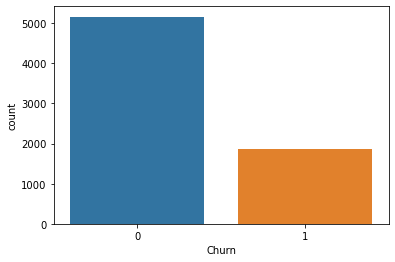

In [137]:
sns.countplot(x=data['Churn'])
plt.show()

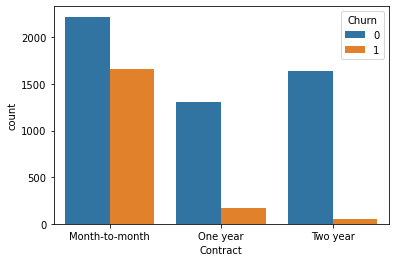

Contract        Churn
Month-to-month  0        2220
                1        1655
One year        0        1306
                1         166
Two year        0        1637
                1          48
Name: Contract, dtype: int64

In [138]:
sns.countplot(x=data['Contract'],hue=data['Churn'])
plt.show()
data.groupby(by=['Contract','Churn'])['Contract'].count()

In [139]:
# This shows that customers with month-to-month contracts tends to churn more than any other contract.

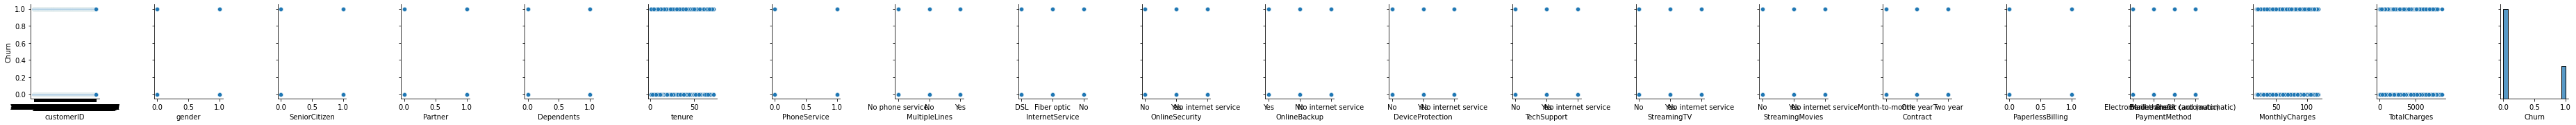

In [140]:
#sns.pairplot(x_vars= data.columns,y_vars=['Churn'],data=data)

### Detecting and Treating Outliers

#### BoxPlot of some categorical data

<AxesSubplot:xlabel='gender', ylabel='tenure'>

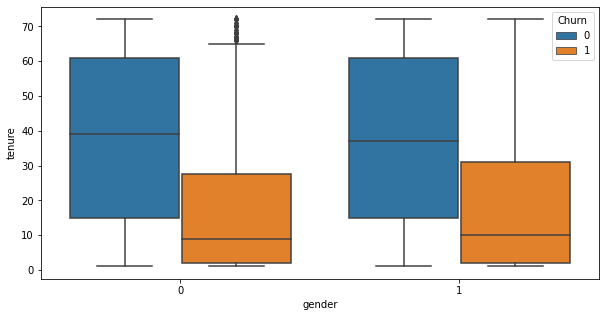

In [141]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='gender', y='tenure', hue='Churn')

In [142]:
# The BarPlot shows some outliers for female who churn,
# The barplot also shows regardless of gender, people who have a lower tenure period 
# tend to churn more with identical representations for both genders
data[(data['tenure']>65) & (data['gender']=='Female') & (data['Churn']=='Yes')]
# There is nothing we can do here

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

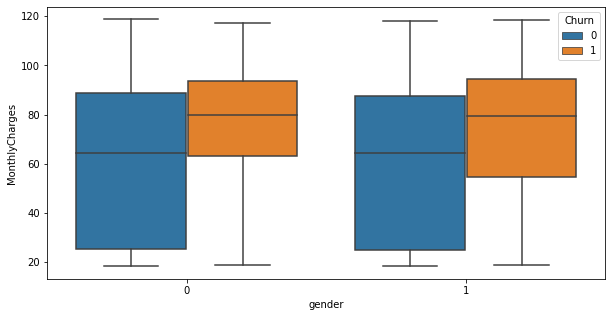

In [143]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='gender', y='MonthlyCharges', hue='Churn')

In [144]:
# No outlier found, The BarPlot also shows that regardless of gender people who have higher MonthlyCharges tends to Churn more

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

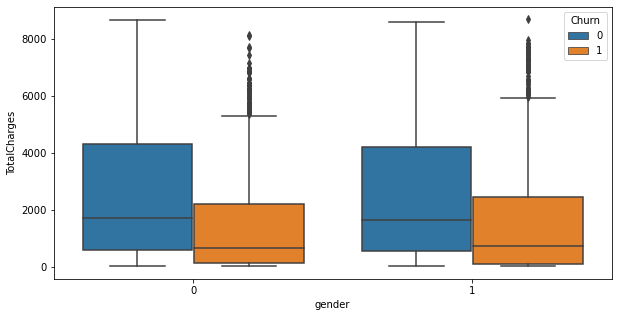

In [145]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='gender', y='TotalCharges', hue='Churn')

In [146]:
# Outliers detected, The BarPlot also shows that regardless of gender people who have higher TotalCharges tends to Churn more
data[(data['TotalCharges']>5000) & (data['Churn']=='Yes')]
#Nothing we can do here

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Feature Selection

In [147]:
#Drop the columns we don't need
data.drop(columns=['customerID'],inplace= True)

In [148]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [149]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


<AxesSubplot:>

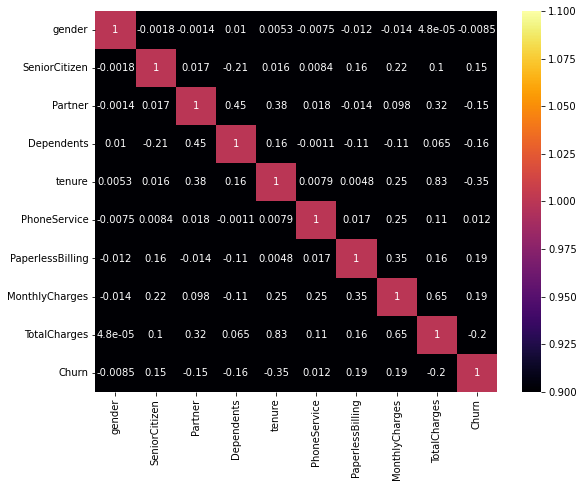

In [151]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),vmax=1 ,vmin=1,annot=True, cmap= 'inferno')

### Feature Engineering

In [152]:
data=pd.get_dummies(data,drop_first=True)

In [153]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

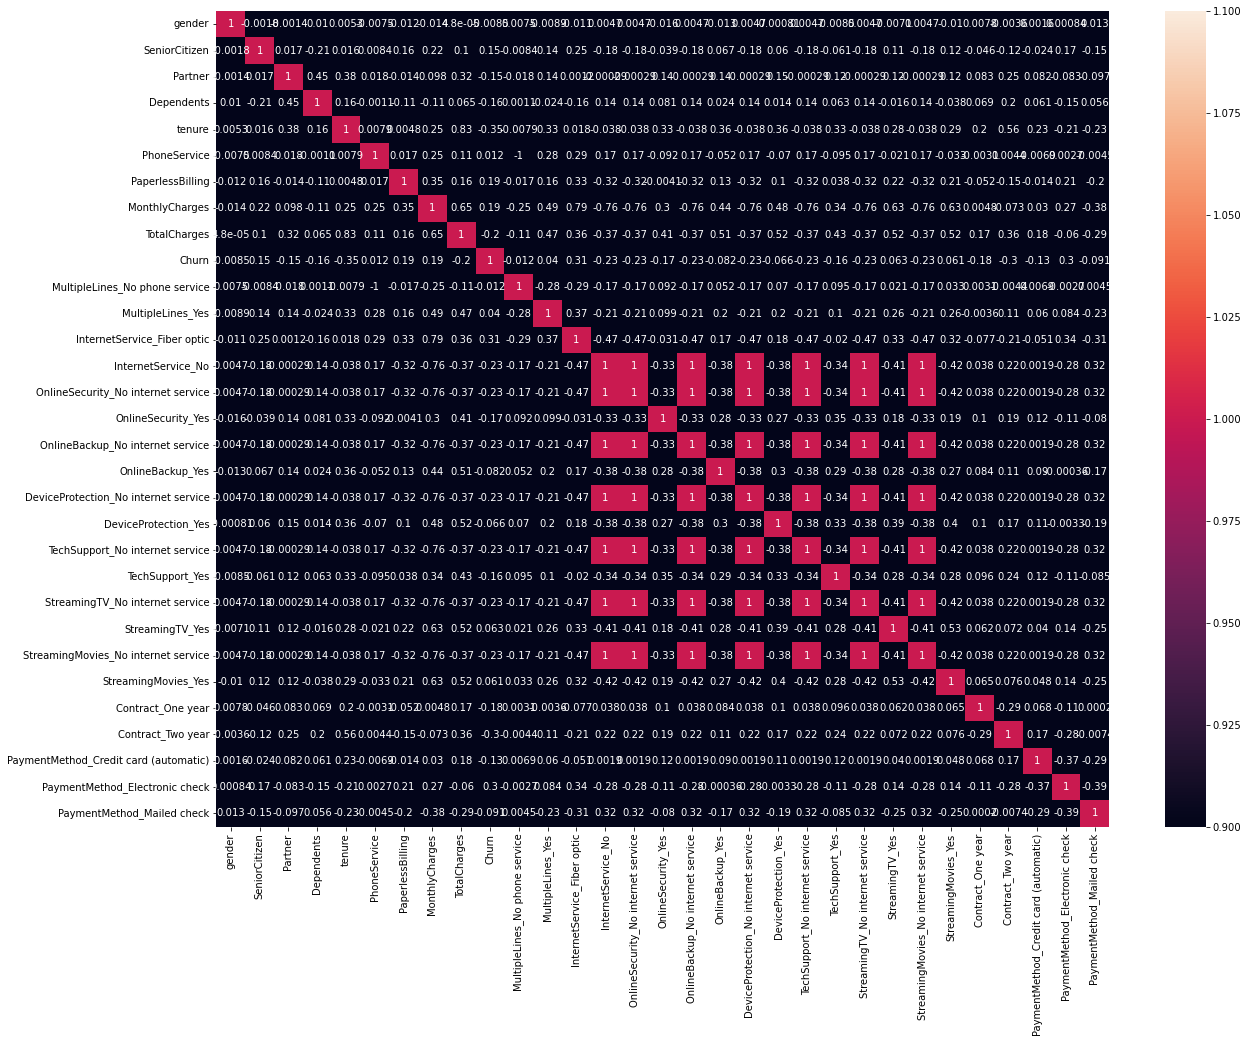

In [165]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),vmax=1,vmin=1,annot=True)

### Train Split Test

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x=data.drop(columns=['Churn'])
y=data['Churn']

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=10)

In [172]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5274, 30) (1758, 30) (5274,) (1758,)


### SVM Classifier

In [211]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [191]:
model_svm= SVC()
sc= StandardScaler()

In [192]:
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.fit_transform(x_test)

In [196]:
x_train_s

array([[-1.01105849,  2.26080514, -0.9609441 , ..., -0.52424883,
         1.39394417, -0.54506686],
       [ 0.98906247, -0.4423203 , -0.9609441 , ...,  1.90749113,
        -0.71738884, -0.54506686],
       [-1.01105849, -0.4423203 , -0.9609441 , ...,  1.90749113,
        -0.71738884, -0.54506686],
       ...,
       [ 0.98906247, -0.4423203 , -0.9609441 , ..., -0.52424883,
        -0.71738884,  1.8346373 ],
       [ 0.98906247, -0.4423203 , -0.9609441 , ..., -0.52424883,
        -0.71738884,  1.8346373 ],
       [-1.01105849, -0.4423203 , -0.9609441 , ..., -0.52424883,
        -0.71738884,  1.8346373 ]])

In [214]:
params= {'C':[1,2,3],
        'gamma':['scale','auto'],
        'kernel':['rbf','poly','sigmoid','linear']}

In [215]:
gscv= GridSearchCV(estimator=model_svm,
                  param_grid=params,
                  cv=5, verbose=2)

In [216]:
gscv.fit(x_train_s,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END ...................C=1, gamma=scale, k

[CV] END ........................C=3, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ........................C=3, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ........................C=3, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END ........................C=3, gamma=auto, kernel=rbf; total time=   0.4s
[CV] END .......................C=3, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=3, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=3, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=3, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .......................C=3, gamma=auto, kernel=poly; total time=   0.3s
[CV] END ....................C=3, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=3, gamma=auto, kernel=sigmoid; total time=   0.3s
[CV] END ....................C=3, gamma=auto, kernel=sigmoid; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [217]:
gscv.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [218]:
gscv.best_score_

0.8001503637688068

In [221]:
model_svm= SVC(**gscv.best_params_)

In [222]:
model_svm.fit(x_train_s,y_train)

SVC(C=1, kernel='linear')

In [223]:
y_pred= model_svm.predict(x_test_s)

In [229]:
model_svm.score(x_test,y_test)

0.7343572241183163

### Validation

In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [226]:
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))
print('Precision :', precision_score(y_test,y_pred))
print('F1 score :', f1_score(y_test,y_pred))

Confusion matrix 
 [[1154  137]
 [ 225  242]]
Accuracy:  0.7940841865756542
Recall : 0.5182012847965739
Precision : 0.6385224274406333
F1 score : 0.5721040189125296
